## **Text Mining**

# Load Dataset

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

df_ratings = pd.read_csv('https://raw.githubusercontent.com/droideronline/Business-Analytics-Movielens-Analysis/main/ratings.dat', sep='::', names=['user_id', 'movie_id', 'rating', 'timestamp'], engine='python')
df_users = pd.read_csv('https://raw.githubusercontent.com/droideronline/Business-Analytics-Movielens-Analysis/main/users.dat', sep='::', names=['user_id', 'gender', 'age', 'occupation', 'zip_code'], engine='python')
df_movies = pd.read_csv('https://raw.githubusercontent.com/droideronline/Business-Analytics-Movielens-Analysis/main/movies.dat', sep='::', names=['movie_id', 'title', 'genres'], engine='python', encoding='ISO-8859-1')

df_ratings = df_ratings.sample(n=20000 , random_state=42)

In [2]:
# Merge the ratings dataset with the users dataset
df_merged = pd.merge(df_ratings, df_users, on='user_id')

# Merge the merged dataset with the movies dataset
df_merged = pd.merge(df_merged, df_movies, on='movie_id')

# Preprocessing

In [3]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# Convert to lowercase
df_merged['title'] = df_merged['title'].str.lower()

# Remove punctuation
df_merged['title'] = df_merged['title'].str.replace(r'[^\w\s]', '')

# Tokenization
df_merged['title_tokens'] = df_merged['title'].apply(word_tokenize)

# Remove stopwords
stopwords = set(stopwords.words('english'))
df_merged['title_tokens'] = df_merged['title_tokens'].apply(lambda tokens: [word for word in tokens if word not in stopwords])

# Stemming
stemmer = PorterStemmer()
df_merged['title_tokens'] = df_merged['title_tokens'].apply(lambda tokens: [stemmer.stem(word) for word in tokens])

# Print words after preprocessing
for tokens in df_merged['title_tokens']:
    print(tokens)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-3-e45bbb2b561c>:14: FutureWarning: The default value of regex will change from True to False in a future version.
  df_merged['title'] = df_merged['title'].str.replace(r'[^\w\s]', '')


Streaming output truncated to the last 5000 lines.
['breakfast', 'club', '1985']
['breakfast', 'club', '1985']
['breakfast', 'club', '1985']
['breakfast', 'club', '1985']
['breakfast', 'club', '1985']
['breakfast', 'club', '1985']
['breakfast', 'club', '1985']
['breakfast', 'club', '1985']
['breakfast', 'club', '1985']
['breakfast', 'club', '1985']
['breakfast', 'club', '1985']
['breakfast', 'club', '1985']
['breakfast', 'club', '1985']
['breakfast', 'club', '1985']
['breakfast', 'club', '1985']
['breakfast', 'club', '1985']
['breakfast', 'club', '1985']
['breakfast', 'club', '1985']
['breakfast', 'club', '1985']
['breakfast', 'club', '1985']
['boy', 'brazil', '1978']
['boy', 'brazil', '1978']
['boy', 'brazil', '1978']
['boy', 'brazil', '1978']
['presidio', '1988']
['presidio', '1988']
['presidio', '1988']
['clockwork', 'orang', '1971']
['clockwork', 'orang', '1971']
['clockwork', 'orang', '1971']
['clockwork', 'orang', '1971']
['clockwork', 'orang', '1971']
['clockwork', 'orang', '197

# Frequency Analysis

In [4]:
import pandas as pd
from nltk.tokenize import word_tokenize
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import gensim
from gensim import corpora

# Frequency analysis
all_tokens = [token for tokens in df_merged['title_tokens'] for token in tokens]
word_frequencies = Counter(all_tokens)
print(word_frequencies.most_common(10))


[('1999', 1761), ('1997', 1346), ('1998', 1341), ('1995', 1279), ('1996', 1134), ('1994', 1091), ('1993', 863), ('2000', 831), ('1992', 737), ('1986', 661)]


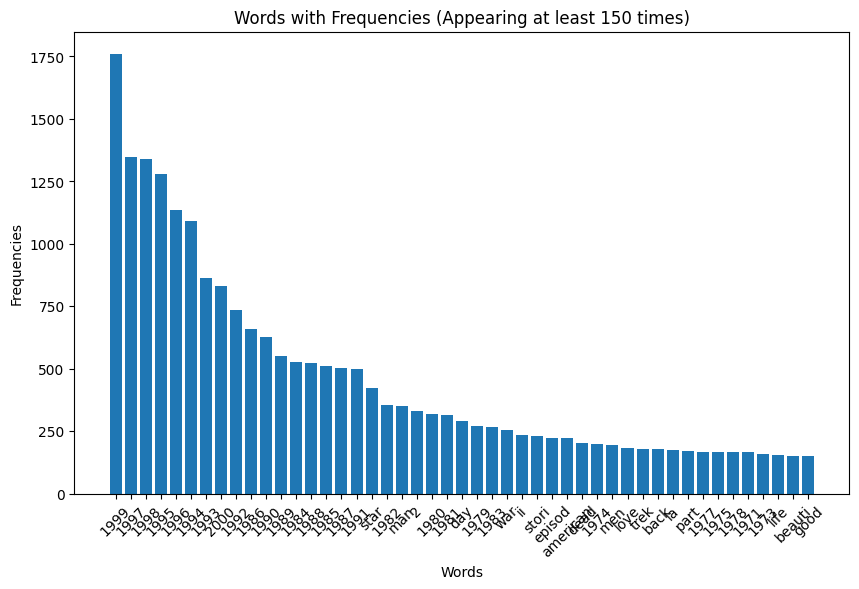

In [5]:
# Calculate word frequencies
word_frequencies = Counter(all_tokens)

# Filter words that appear at least 150 times
common_words = [word for word, freq in word_frequencies.items() if freq >= 150]

# Create a bar chart of word frequencies
common_word_freq = {word: freq for word, freq in word_frequencies.items() if word in common_words}
sorted_word_freq = sorted(common_word_freq.items(), key=lambda x: x[1], reverse=True)
words, freqs = zip(*sorted_word_freq)

plt.figure(figsize=(10, 6))
plt.bar(words, freqs)
plt.xticks(rotation=45)
plt.xlabel('Words')
plt.ylabel('Frequencies')
plt.title('Words with Frequencies (Appearing at least 150 times)')
plt.show()


# Word CLoud

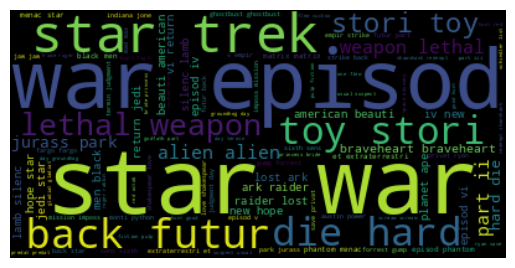

In [6]:
# Word cloud
all_tokens_str = ' '.join(all_tokens)
wordcloud = WordCloud().generate(all_tokens_str)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Topic Modeling

In [7]:
# Topic modeling
dictionary = corpora.Dictionary(df_merged['title_tokens'])
corpus = [dictionary.doc2bow(tokens) for tokens in df_merged['title_tokens']]
lda_model = gensim.models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=10)
for topic_id, topic in lda_model.print_topics():
    print(f'Topic {topic_id}: {topic}')

Topic 0: 0.140*"1999" + 0.092*"1997" + 0.030*"1985" + 0.021*"1982" + 0.021*"1981" + 0.019*"ii" + 0.014*"night" + 0.012*"men" + 0.011*"part" + 0.010*"big"
Topic 1: 0.083*"1993" + 0.056*"1986" + 0.022*"star" + 0.015*"adventur" + 0.014*"american" + 0.014*"1977" + 0.012*"war" + 0.011*"trek" + 0.011*"1985" + 0.010*"1961"
Topic 2: 0.117*"1998" + 0.036*"1989" + 0.022*"1980" + 0.016*"love" + 0.015*"1971" + 0.014*"1974" + 0.013*"mr" + 0.011*"iii" + 0.011*"1968" + 0.010*"1972"
Topic 3: 0.094*"1995" + 0.082*"1994" + 0.041*"1990" + 0.033*"1991" + 0.033*"1988" + 0.031*"man" + 0.018*"1979" + 0.013*"stori" + 0.012*"2" + 0.010*"blue"
Topic 4: 0.084*"1996" + 0.058*"2000" + 0.049*"1992" + 0.035*"1984" + 0.033*"1987" + 0.018*"day" + 0.016*"1983" + 0.012*"1978" + 0.011*"life" + 0.010*"1975"
